In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r"boston.csv")

In [4]:
data.head()
# CRIM 犯罪率
# ZN 附近豪宅比例
# INDUS 非零售小区比例
# CHAS 是否为河边
# NOX 一氧化氮浓度
# RM 平均房间数量
# AGE 老房子比例
# DIS 离波士顿中心的距离
# RAD 离公路的距离
# TAX 税
# PTRATIO 师生比例
# B 非美籍人口比例
# LSTAT 弱势群体比例
# MEDV 房屋均价　
data.info()
data.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


False

In [5]:
class LinearRegression:
    '''最小二乘法的线性回归'''
    
    def fit(self, X, y):
        '''训练Ｘ
        
        Parameters
        ---
        X:[样本数量，样本特征]
        
        y:[样本数量]
        '''

        # 说明，如果Ｘ是数组对象的一部分（比如是一个其它数组的切片），而不是完整的对象，则无法完成矩阵的转换
        # 所以创建Ｘ的拷贝对象，防止转换失败
        X = np.asmatrix(X.copy())
        # 一维结构可以不用拷贝，不会出错
        # 但是需要变成二维矩阵，－１指的是行数是所有行，列是一列，就是列向量
        y = np.asmatrix(y).reshape(-1, 1)
        # 通过最小二乘公式，求解出最佳的权重值
        # nd_array是直接对位数乘，ｍａｔｒｉｘ对象的乘法是矩阵乘法
        self.w_ = (X.T * X).I * X.T * y
    
    def predict(self, X):
        '''对样本进行预测
        
        Parameters
        ---
        X:[样本数量,样本特征]
        
        y:[样本数量]
        
        Returns
        ---
        result: 数组，预测结果
        '''
        
        X = np.asmatrix(X.copy())
        result = X * self.w_
        
        # 将矩阵变成数组,ravel可以扁平化处理
        return np.array(result).ravel()

In [7]:
#增加截距
new_columns = pd.DataFrame(data=np.ones((len(data),1)), columns=["Intercept"])
data = pd.concat(objs=[new_columns, data], axis=1)

t = data.sample(len(data), random_state=0)

#数据分组
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)

display(lr.w_)
display(np.mean((result - test_y) ** 2))

matrix([[-1.24892274e+17],
        [ 4.58840072e+16],
        [ 1.06809228e+00],
        [ 2.01917933e+00],
        [ 2.66563679e+00],
        [ 1.29269959e+02],
        [-1.70132395e+03],
        [ 4.62690797e+00],
        [ 7.74556708e-01],
        [-6.57078234e+01],
        [ 1.14302999e+00],
        [ 1.20118046e-03],
        [ 4.65112040e+01],
        [-4.25264891e-02],
        [-2.53053867e+00]])

6.242306213914456e+33

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

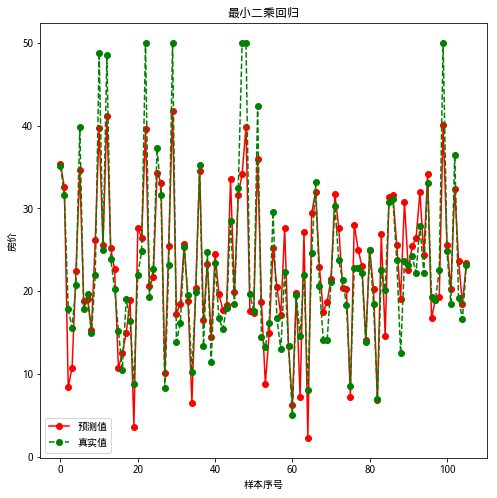

In [30]:
plt.figure(figsize=[8,8])
#绘制预测值
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.title("最小二乘回归")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()